# Introduction to Machine Learning using Decision Tree and Random Forest

## Workshop approach
We will follow this workshop having a mixt approach between writing code and learning theoretical details. We learn faster and better if we start to code as soon as possible, either in Machine Learning or other domains. <br>
I think we are all agree that theoretical world is not the same as practical/code world.

## ML requirements
<b>Data</b> <br>
To develop a ML project, first we need a dataset. <br>

There are hundreds of dataset available online for free and waiting to be used !
- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- [Kaggle datasets](https://www.kaggle.com/datasets)
- [ask google](https://www.google.com/search?ei=R2QMXZD9MNaD8gL4uYPoCw&q=machine+learning+open+datasets&oq=machine+learning+open+datasets&gs_l=psy-ab.3..0i203j0i8i30.5101.6297..6496...1.0..0.128.673.0j6......0....1..gws-wiz.......0i71j35i304i39j0i7i30j0i13j0i8i7i30j0i7i30i19j0i8i7i30i19j0i19j0i8i13i30i19.lyx-wjPDejE)

If we don't already have in place a dataset, we need first to plan how to collect and store our data. <br>
This phase of how to store the data is very important, because based on it rely most our ML project work. <br>
It is well known that approx. 80% from a ML project development is spend on data exploration, data cleaning, data transformation.

<i>data cleaning examples and tools used for it... </i>

<b>Software (ML libraries) </b> <br>
Yes, it's true that ML algorithms are based on mathematic. But it's also true that most of these algorithms are already implemented in a lot of libraries, so we don't need to know all the math details. <br>
Most of the time, is it enough to have a general understanding of what a ML algorithm does to apply it with success on our project. Of course, if you deep dive into the details implementation, you will start to master it and if you master something you will have a better success. <br>

OK, we know that there are ML libraries to use but what programming languages do we need to know to use them ? The most common ones are Python and R. There are also libraries written for example in Java, .Net, Scala, but either are in to early stage, implement only a few algorithms, those algorithms aren't the most efficent ones implemented and have a weak comunity/suport behind them. <br>

Python and R are the most common programming languages when it's about ML. Python has the advantage that has a strong and large community itself and also that the latest best ML libraries support Python. R language was very used in the past, but it seems to have a descending path in the last years. 

Most common Python libraries : (look in how to win a kaggle competition for other libraries)
- Scikit-learn
- Spark ML
- Theano
- TensorFlow
- Keras
- PyTorch

<i> explain differences between libraries </i>


Nowadays, it's pretty easy to install and use these libraries. We can either install them on our personal computers or access them from cloud services. Just to see how important and useful are them for software industry, the biggest cloud providers created services around them :
- amazon
- microsoft
- google
- lentiq or bigstep ?

<i>link references</i>


<b>Hardware</b> <br>
Every software needs hardware. This is the case also for ML. <br>
Hardware specifications are related to the type of project and mostly to the volume of data. If the volume of data if big, we clearly will need more power(CPU, memory) to proccess it. <br>

For computer vision, is indicated to have a [GPU](https://en.wikipedia.org/wiki/Graphics_processing_unit), a good processor and few tens of memory gigabytes. For traditional ML datasets, where most of the time we have [structure data](https://en.wikipedia.org/wiki/Data_structure) and few hundreds, gigabytes of data is enough a commodity hardware(ex. 4 cores, 8 GBs RAM) . <br>

BUT, if you want to start learning ML, hardware is not an escuse. You can find a small dataset, a lightweight library and this will ran very fast even on the cheapest laptop/PC. <br>

If you are not sure that ML if for you and you are skeptical about investing for hardware, you can choose a cloud solution. In this case you can rent hardware and pay as much as you consume. Nowadays, these services are pretty cheap. <i> look for prices </i>

 



## Our workshop setup

Dataset
- [Titanic dataset](https://data.world/nrippner/titanic-disaster-dataset)

Software 
- [jupyter notebook](https://jupyter.org/)
- [python](https://www.python.org/)
- [sklearn](https://scikit-learn.org/stable/)
- [pandas](https://pandas.pydata.org/)
- [matplotlib](https://matplotlib.org/)
- [woodpecker](https://github.com/tlapusan/woodpecker)

Hardware
- [Lentiq](https://lentiq.com/)
- Your own laptop


<i> workshop general steps </i>

## Main steps for each ML project

- read the data
- data exploration
- data cleaning and data transformation
- initializing and fitting ML models
- model validation
- model structure interpretation
- hyperparameter tuning

# Classification algorithms : DecisionTree and RandomForest

## Imports

Imports in Python, as in any other programming language, are the ways to include other library funtionalities.

Read more from [official docs](https://docs.python.org/3/reference/import.html) about Python imports

In [946]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

import graphviz
from graphviz import Source
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [947]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import sys
sys.path.append(f"/Users/tudorlapusan/Documents/workspaces/ml/woodpecker/")
from woodpecker.decision_tree_structure import DecisionTreeStructure


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [948]:
pd.options.display.max_columns = 999
pd.options.mode.chained_assignment = None  # default='warn'

## Dataset

What are we trying to solve today ?

The dataset is related to the sinking of the Titanic ship. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. <br>
If you are new to a domain, in this case ship disaster, machine learning should help us to understand also the dataset, to get domain knowledge, not only to make predictions !

[Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) <br>

<i>say more details and my opinion about kaggle</i>


<b>Our goal is to predict which passengers survived the tragedy ! </b> <br> <br>


Depending of what we need to predict, the ML algorithms are devided in two main subclasses : <br>
<b>Classification </b>
- we need to predict a class/label (a limited set of values), ex. email is span or not spam, healty or not healty
- the most common is the binary classification, where we need to predict between two classes
- when we need to predict multiple classes, the problem is known as multi-class classification

<b>Regression </b>
- we need to predict a real-value, such as an integer or floating point value, ex price, age, distance 

[Differences between Classification and Regression](https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/)

Above subclasses of algorithms are making part from supervised learning. Why? Because we trained the algorithms based on a known label y (ground truth). Unsupervised learning, on the other hand, does not have labels, so its goal is to infer the natural structure present within a set of data points. [Read more](https://towardsdatascience.com/supervised-vs-unsupervised-learning-14f68e32ea8d)

<i> examples of supervized/unsupervised algorithms </i>

### Read the data

In [949]:
dataset = pd.read_csv("../dataset/titanic/titanic.csv")

In [950]:
dataset.head(10)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
5,1,True,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S
6,1,True,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S
7,1,False,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S
8,1,True,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S
9,1,False,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C


Any machine learning algorithm needs data from where to learn and make relevant predictions ! <br>
In our world, we can find a lot of dataset types, like structure datasets, raw text, images, video, sounds, etc.



[Pandas](http://pandas.pydata.org/) is the most popular library in Python for working with structured datasets. 

During the development of a ML project, working with data is typically devided into multiple stages :
- data transformation and data cleaning
- data analysis, visualisations
- data modeling using ML algorithms

Pandas is the ideal tool for all of these tasks. The main data structures in Pandas are Series (1-dimensional) and DataFrame (2-dimensional).

Pandas DataFrame (can be seen as a SQL table) :
- easy handling of missing data
- add/delete columns 
- powerfull groupby, joins funtionalities
- can read from CSV, excel, databases, json, parquet, etc


[Official docs](http://pandas.pydata.org/pandas-docs/stable/) <br>
[Python for Data Analysis book](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793)





## Initial data analysis

TODO - show few of jupyter shortcuts, like show method documentation <br>
TODO - understand better the shorcut descriptionn <br>
TODO - save intermediary dataset results  <br>
TODO - apply feature encoding separately on train and validation


When working on a ML project we can start with at least two approaches : <br><br>
<b>Data driven approach</b><br>
It assume to start looking at the data, to make a lot of visualisations, discover patterns. By doing this we are making a lot of assumptions about the data and what kind of information we should put in our ML model. <br>
In this way, the model will learn only from our assumptions, which in some cases can be limited or incorect.


<b>ML drive approach </b><br>
This approach assume to look at the data just enough to make it ready for training a ML model (handle missing values, categorical features, etc). After we have a model trained on this data, we interprete its result, structure, behavior and based on these investigations we make assumptions about the data.

<br>
Choose which one fits for you !

### Columns description
<b>pclass </b>: A proxy for socio-economic status (SES). 1st = Upper, 2nd = Middle, 3rd = Lower <br>
<b>survived</b> : True = survived, False = didn't survive <br>
<b>name</b> : passanger name <br>
<b>gender</b> : passanger gender, male or female <br>
<b>age</b> : passanger age <br>
<b>sibsp</b> : # of siblings / spouses aboard the Titanic <br>
<b>parch</b> : # of parents / children aboard the Titanic <br>
<b>ticket</b> : passanger ticket number <br>
<b>fare</b> : passenger fare <br>
<b>embarked</b> : Port of embarkation, C = Cherbourg, Q = Queenstown, S = Southampton <br>

In [919]:
dataset.head(3)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S


### Dataset size

In [920]:
dataset.shape

(1309, 11)

### Check column datatypes

In [921]:
dataset.dtypes

pclass        int64
survived       bool
name         object
gender       object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

### Column summarize

In [922]:
dataset.describe()

,pclass,age,sibsp,parch,fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479
std,0.837836,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


### Visualisations
We understand better and faster if we look visually at the data. <br>
Python community developed a lot of useful libraries for visualistions, but the most used one is [matplotlib](https://matplotlib.org/). Check [here](https://mode.com/blog/python-data-visualization-libraries) for other popular libraries. <br> 


The most common types of visualisations are histograms, line plots and scatter plots.

In [923]:
dataset.head(10)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
5,1,True,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S
6,1,True,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S
7,1,False,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S
8,1,True,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S
9,1,False,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C


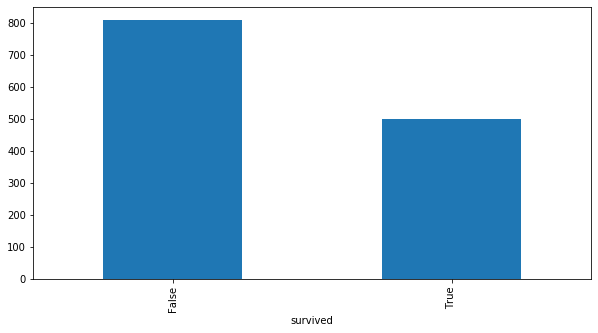

In [924]:
dataset.groupby(["survived"]).size().plot.bar(figsize=(10,5))

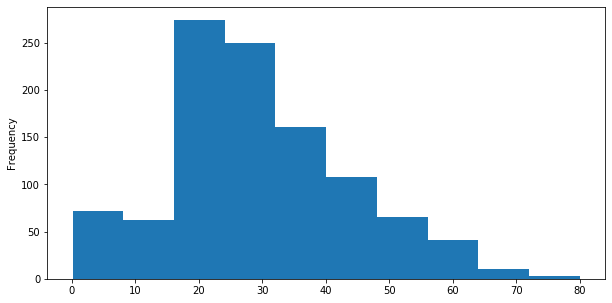

In [925]:
dataset.age.plot.hist(figsize=(10,5))

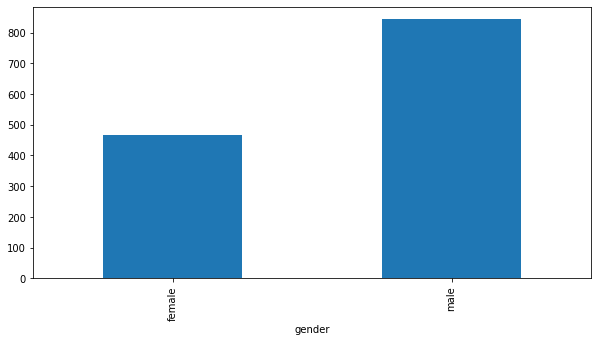

In [939]:
dataset.groupby(["gender"]).size().plot.bar(figsize=(10,5))

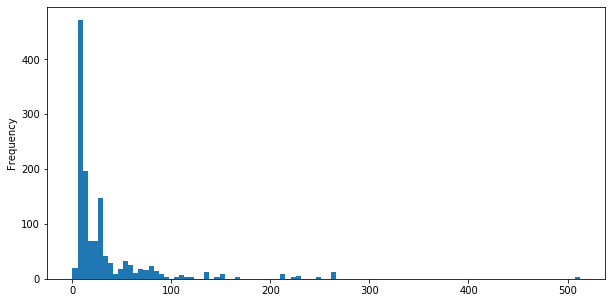

In [942]:
dataset.fare.plot.hist(figsize=(10,5), bins=100)

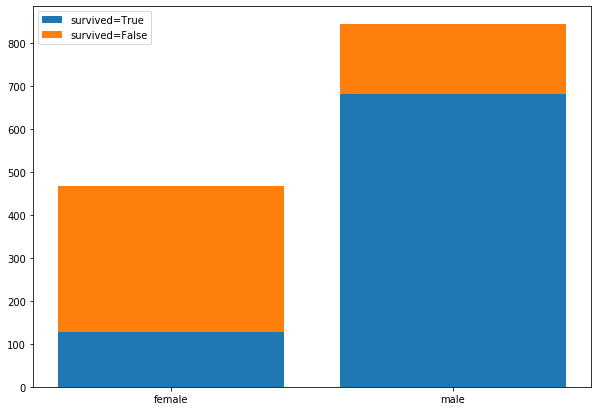

In [929]:
survive_gender_corr = dataset.groupby(["survived", "gender"]).size()

plt.figure(figsize=(10,7))
plt.bar(survive_gender_corr[0].keys().values, survive_gender_corr[0].values, label="survived=True")
plt.bar(survive_gender_corr[1].keys().values, survive_gender_corr[1].values, bottom=survive_gender_corr[0].values, label="survived=False" )
plt.legend()


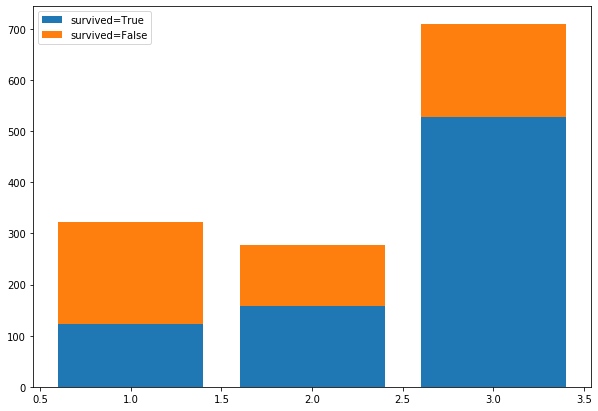

In [940]:
survive_pclass_corr = dataset.groupby(["survived", "pclass"]).size()

plt.figure(figsize=(10,7))
plt.bar(survive_pclass_corr[0].keys().values, survive_pclass_corr[0].values, label="survived=True")
plt.bar(survive_pclass_corr[1].keys().values, survive_pclass_corr[1].values, bottom=survive_pclass_corr[0].values, label="survived=False" )
plt.legend()


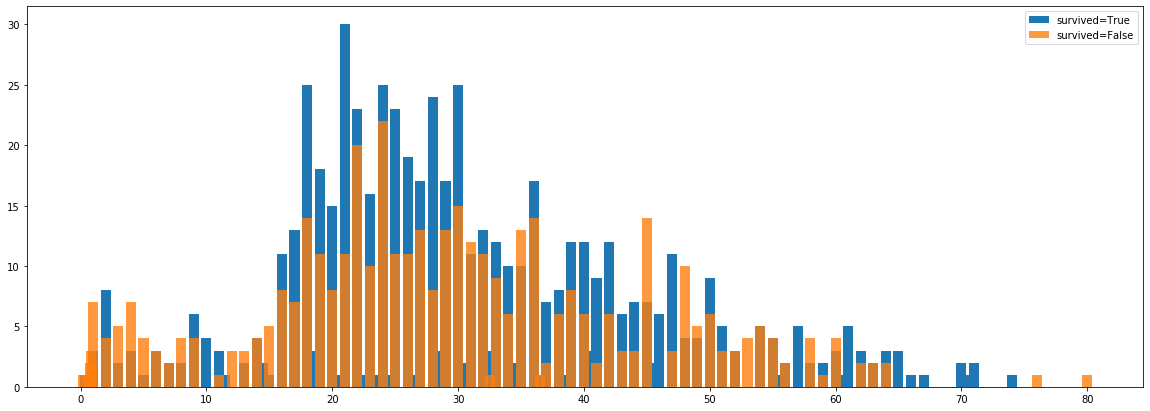

In [938]:
survive_age_corr = dataset.groupby(["survived", "age"]).size()

plt.figure(figsize=(20,7))
plt.bar(survive_age_corr[0].keys().values, survive_age_corr[0].values, label="survived=True")
plt.bar(survive_age_corr[1].keys().values, survive_age_corr[1].values, label="survived=False", alpha=0.8)
plt.legend()

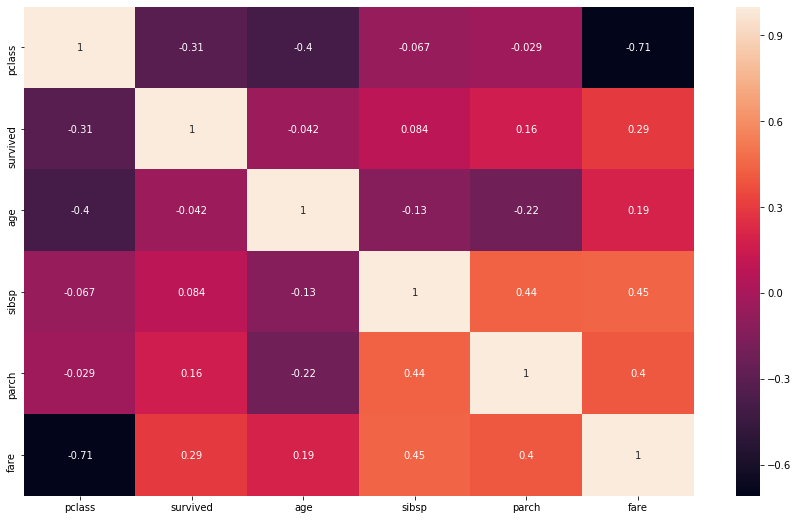

In [943]:
dataset_corr = dataset.corr(method="spearman")
plt.figure(figsize=(15,9))
sns.heatmap(dataset_corr, annot=True)

### Workshop work
- create other visualisations

<i>vis for correlations</i>

## Decision Tree Classifier

One of the biggest 'problem' with learning ML is that we heared about a lot of ML algorithms and we think that we need to know them all to be a good ML enginner. 
In real world, most of the time is enough to know two subtypes of ML algorithms :
 - DecisionTree, RandomForest for structure data
 - Deep Learning for image, text, sound processing

Main advantages of DecisionTree :
- can be used for both classification and regression
- don't require too much feature enginner
- they are interpretable
- they have pretty good results
- easy to learn and understand
- they are the base for other performant models, like RandomForest, XGBoost.


![Decision tree](../resources/images/decision_tree_classifier_sample.png)


For DecisionTreeClassifier we need to find the best splits based on node impurities. Algorithm target is to create nodes with impurity as close as possible to 0. This will result in nodes containing samples almost from one single class.

Common measures of impurity are [gini, entropy and misclasificaion](https://scikit-learn.org/stable/modules/tree.html#classification-criteria). 

<img src="../resources/images/node_impurity.png" alt="drawing" width="60%" height="60%"/>

Information gain (IG) is used to select the best split. <br>
The feature which generate the biggest IG is chosen to split the node.

<img src="../resources/images/information_gain.png" alt="drawing" width="60%" height="60%"/>

In [244]:
def get_gini(samples):
    return samples[0]/sum(samples)*(1-samples[0]/sum(samples)) + samples[1]/sum(samples)*(1-samples[1]/sum(samples))
    

In [245]:
def get_ig(s1, s2, s3):
    return get_gini(s1) - ((sum(s2)/sum(s1)*get_gini(s2) + sum(s3)/sum(s1)*get_gini(s3)))

In [246]:
samples = [1, 25]

In [247]:
get_ig([20,30], [10,10], [10,20])

0.013333333333333308

In [248]:
get_ig([20,30], [19,5], [1,25])

0.28320512820512816

### Feature selection

A machine learning algorithm understand a dataset using its features (X) and target variable (y) ! <br>
Features are the input properties from the dataset, on which the model is trained to make good predictions for target variable. <br>

In [250]:
dataset.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,sex_cat,embarked_cat,age_missing,fare_missing
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,0,2,False,False
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1,2,False,False
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,2,False,False
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,1,2,False,False
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0,2,False,False


In [358]:
feature_set_v1 = ["gender", "age", "fare", "embarked"]
target = "survived"

In [359]:
dataset[feature_set_v1 + [target]].head(3)

,gender,age,fare,embarked,survived
0,female,29.0000,211.3375,S,True
1,male,0.9167,151.5500,S,True
2,female,2.0000,151.5500,S,False


### Initializing and training a DecisionTreeClassifier

In [360]:
dt_v1 = DecisionTreeClassifier(max_depth=10)

In [361]:
dt_v1.fit(dataset[feature_set_v1], dataset[target])

ValueError: could not convert string to float: 'female'

### Feature encoding

In [362]:
dataset.head(5)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,gender_cat,embarked_cat,age_missing,fare_missing
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,0,2,False,False
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1,2,False,False
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,2,False,False
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,1,2,False,False
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0,2,False,False


In Machine Learning we have two main types of features : <br>
- <b>Numerical features </b> <br>
    Like age, price, duration
- <b>Categorical features</b>
    - nominal features <br>
    We don't have any logical order for feature values. ex. color, job, weather conditions, 
    - ordinal features <br>
    We have a logical order. ex. education, month, t-shirt size

There are many ways to convert a categorical feature into a numerical one, almost each ML related library contains one. <br>

One of the most populars are : <br>
sklearn : [LabelEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) <br>
pandas : [Categorical data](http://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

<br>
<b>Pandas categorical data types </b><br>
Categorical data types are using integer values  to represent the raw values from a column. <br>
Behind, pandas is using a dictionary to keep all the mappings between integer values and raw values. Beside encoding functionality, categorical values can be used for memory saving.
 


In [363]:
# convert a string type to categorical type
dataset.gender.astype("category")

0       female
1         male
2       female
3         male
4       female
5         male
6       female
7         male
8       female
9         male
10        male
11      female
12      female
13      female
14        male
15        male
16        male
17      female
18      female
19        male
20        male
21      female
22        male
23      female
24      female
25        male
26        male
27      female
28      female
29        male
         ...  
1279    female
1280      male
1281      male
1282      male
1283      male
1284      male
1285      male
1286    female
1287      male
1288      male
1289      male
1290    female
1291      male
1292      male
1293      male
1294      male
1295      male
1296      male
1297      male
1298      male
1299      male
1300    female
1301      male
1302      male
1303      male
1304    female
1305    female
1306      male
1307      male
1308      male
Name: gender, Length: 1309, dtype: category
Categories (2, object): [female, male]

In [364]:
dataset.sex.astype("category").cat.codes

AttributeError: 'DataFrame' object has no attribute 'sex'

In [365]:
def encode_columns_as_categories(_dataset, _column_set):
    for column in _column_set:
        _dataset[f"{column}_cat"] = _dataset[column].astype("category").cat.codes

In [311]:
encode_columns_as_categories(dataset, ["gender", "embarked"])


In [312]:
dataset.head(5)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,gender_cat,embarked_cat
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,0,2
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1,2
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,2
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,1,2
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0,2


In [313]:
dataset.dtypes

pclass            int64
survived           bool
name             object
gender           object
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
gender_cat         int8
embarked_cat       int8
dtype: object

In [315]:
feature_set_v2 = ["gender_cat", "age", "fare", "embarked_cat"]

In [355]:
dt_v2 = DecisionTreeClassifier(max_depth=10)
dt_v2.fit(dataset[feature_set_v2], dataset[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Handle missing values
Having missing data in our datasets is pretty common. It can be caused by human error, software bug or simple the value isn't known. <br> 
Possible values for missing values are :  ‘NaN’, ‘NA’, ‘None’, ‘ ’, ‘?’, etc

The simplest solution is to remove the rows with missing values. The main disadvantage of this method is that we remove information from our dataset.

Another solution is to fill the missing data with some values. For numerical features, the most common method is to replace by mean or median (if there are ourliers). For categorical features, we can replace by the most frequest value.



In [318]:
dataset[feature_set_v2].isna().any()

gender_cat      False
age              True
fare             True
embarked_cat    False
dtype: bool

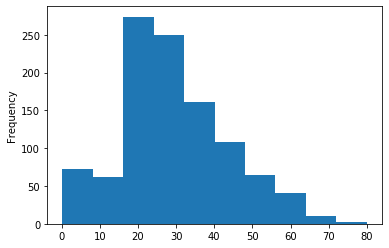

In [327]:
dataset.age.plot.hist()

In [329]:
dataset.age.mean()

29.881134512428297

In [330]:
dataset["age_missing"] = dataset.age.isna()
dataset.fillna({"age":dataset.age.mean()}, inplace = True)

### workshop work

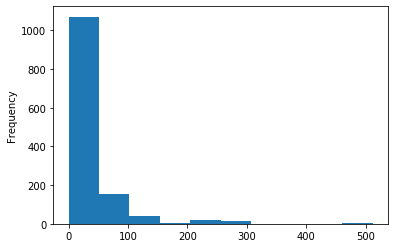

In [331]:
dataset.fare.plot.hist()

In [332]:
dataset["fare_missing"] = dataset.fare.isna()
dataset.fillna({"fare" : dataset.fare.median()}, inplace=True)

In [333]:
dataset[feature_set_v2].isna().any()

gender_cat      False
age             False
fare            False
embarked_cat    False
dtype: bool

In [336]:
feature_set_v3 = ["gender_cat", "age", "age_missing", "fare", "fare_missing", "embarked_cat"]

In [437]:
dt_v3 = DecisionTreeClassifier(max_depth=10)
%time dt_v3.fit(dataset[feature_set_v3], dataset[target])

CPU times: user 4.77 ms, sys: 621 µs, total: 5.39 ms
Wall time: 4.79 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

We succeded to train our first DecisionTreeClassifier model !!! <br>
To reach this step, we needed to :
 - load the dataset
 - to know what we are trying to solve 
 - to make the dataset ready for the model. 
 
We needed to encode categorical features into numerical features and to handle missing data. These operations are known under the concept of <b>feature engineering</b>. <br>
In our case, we spend only a few time on feature enginner, but in real use-cases we need to spend a lot of time, mostly because the dataset isn't in a good shape, like this one. <br>

<b>Most of the time, good feature enginner would reflect in better model performance. <b>








#### Utils functions

In [438]:
def save_decision_tree_structure(model_param, filename_param, features_param):
    graph = Source(tree.export_graphviz(model_param, feature_names=features_param, class_names=["0", "1"],
                                                filled=True, node_ids=True))
    graph.format = 'png'
    graph.render(filename=filename_param,view=True)
    
# save_decision_tree_structure(dt_v3, "decision_tree_classifier_sample", features_param=feature_set_v3)

def show_features_importance(decision_tree, features, figsize=(20, 10)):
        """Visual representation of features importance.


        Features are ordered descending by their importance using a bar plot visualisation.
        oX contains features name and oY contains features importance.

        :param figsize: tuple
            the size (x, y) of the plot (default is (20, 10))
        :return: None
        """

        feature_names, feature_importances = zip(
            *sorted(list(zip(decision_tree.feature_importances_, features)), key=lambda tup: tup[0],
                    reverse=True))
        plt.figure(figsize=figsize)
        plt.bar(feature_importances, feature_names)
        plt.xlabel("feature name", fontsize=20)
        plt.ylabel("feature importance", fontsize=20)
        plt.grid()
        plt.show()
        
def show_decision_tree_structure(decision_tree, features):
        """Show decision woodpecker structure as a binary woodpecker.

        It is just an utility method for graphviz functionality to render a decision woodpecker structure.

        :return: graphviz.files.Source
        """

        dot_data = tree.export_graphviz(decision_tree, out_file=None, feature_names=features,
                                                filled=True, node_ids=True)
        return graphviz.Source(dot_data)

### Prediction description

Let's take 10 random samples from our dataset.

In [439]:
dataset_predictions = dataset.sample(frac=1).head(10)

In [352]:
dataset_predictions[feature_set_v3 + [target]]

,gender_cat,age,age_missing,fare,fare_missing,embarked_cat,survived
830,1,14.000000,False,46.9000,False,2,False
889,1,26.000000,False,7.7750,False,2,True
418,1,47.000000,False,10.5000,False,2,False
1004,0,29.881135,False,7.7875,False,1,True
256,1,29.881135,False,26.0000,False,2,True
969,0,30.000000,False,15.5500,False,2,False
560,0,30.000000,False,13.0000,False,2,True
1131,1,32.000000,False,8.0500,False,2,True
757,0,29.881135,False,16.1000,False,2,True
217,1,64.000000,False,26.0000,False,2,False


DecisionTreeClassifier contains predict and predict_proba methods for making predictions : <br>
- predict method returns the predicted class 
- predict_proba returns the class probabilities 

In [353]:
dt_v3.predict(dataset_predictions[feature_set_v3])

array([False, False, False,  True, False,  True,  True, False,  True,
       False])

In [354]:
dt_v3.predict_proba(dataset_predictions[feature_set_v3])

array([[0.95652174, 0.04347826],
       [0.79245283, 0.20754717],
       [0.82926829, 0.17073171],
       [0.41538462, 0.58461538],
       [0.86885246, 0.13114754],
       [0.31623932, 0.68376068],
       [0.12      , 0.88      ],
       [0.91860465, 0.08139535],
       [0.31623932, 0.68376068],
       [0.97777778, 0.02222222]])

### Model validation

The role of model validation is to check the model performance ! <br>

In our case, we are ask to correctly classify if a person survived or didn't survived. So, our model should predict as many as possible, the correct answers.

The metric we should use is the accuracy metric. It tells us the percentage of correct predictions made by our model, in others words : accuracy = (number of corrent predictions / total number of predictions). <br>
[Check for others validation metrics for classification](https://scikit-learn.org/stable/modules/classes.html#classification-metrics)



In [367]:
accuracy_score(dataset[target], dt_v3.predict(dataset[feature_set_v3]))

0.868601986249045

### Validation strategies  

The rule number one : validation strategy should reflect as much as possible how the model will behave in production. <br>

The most common validation strategy is holdout method, where we split our dataset in two parts, training and validation datasets. <br>
One splitting method would be to shuffle the data and choose 70% of them in training and 30% into validation. 

In [375]:
random_state = 1987

In [383]:
train, validation = train_test_split(dataset, train_size=0.7, random_state=random_state, stratify = dataset.survived)

In [384]:
print(f"train size {train.shape[0]}")
print(f"validation size {validation.shape[0]}")

train size 916
validation size 393


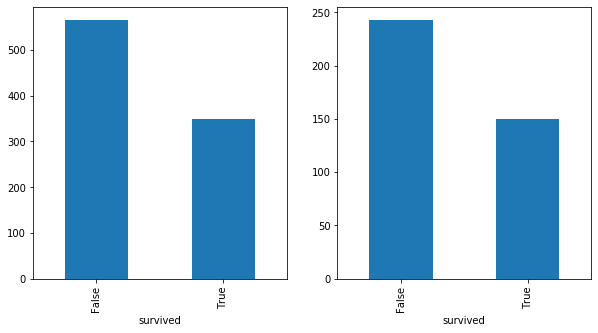

In [385]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
train.groupby("survived").size().plot.bar()
plt.subplot(1,2,2)
validation.groupby("survived").size().plot.bar()

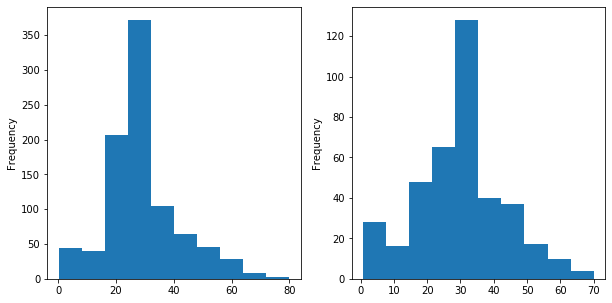

In [386]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
train.age.plot.hist()
plt.subplot(1,2,2)
validation.age.plot.hist()

In [427]:
dt_v4 = DecisionTreeClassifier(max_depth=5, random_state=random_state)
dt_v4.fit(train[feature_set_v3], train[target])


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1987, splitter='best')

In [428]:
print(f"training accuracy {accuracy_score(train[target], dt_v4.predict(train[feature_set_v3]))}")
print(f"validation accuracy {accuracy_score(validation[target], dt_v4.predict(validation[feature_set_v3]))}")

training accuracy 0.8275109170305677
validation accuracy 0.7480916030534351


#### Workshop work
- try different max_depth values

### Underfitting and overfitting

<img src="../resources/images/underfitting_overfitting.png" />

### Model interpretation

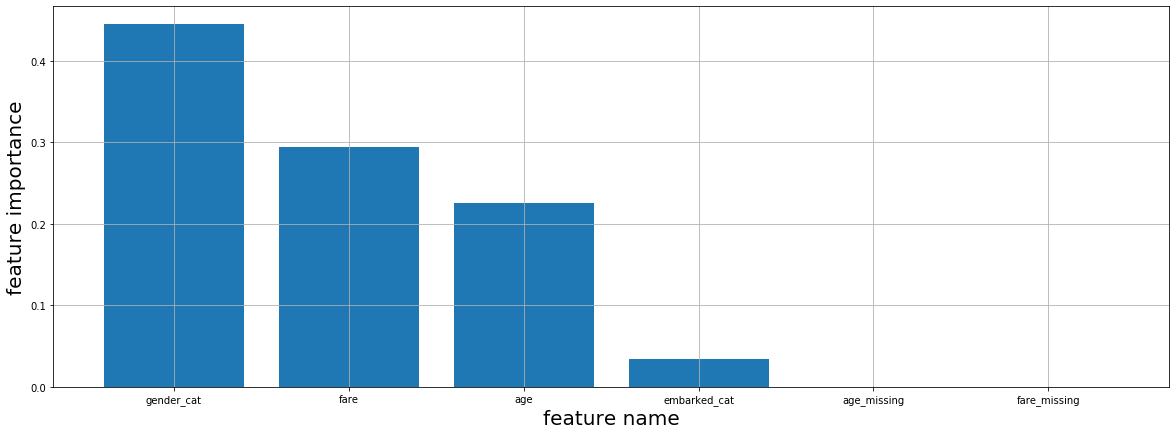

In [391]:
show_features_importance(dt_v4, feature_set_v3, figsize=(20,7))

In [394]:
save_decision_tree_structure(dt_v4, "decision_tree_classifier_sample", features_param=feature_set_v3)

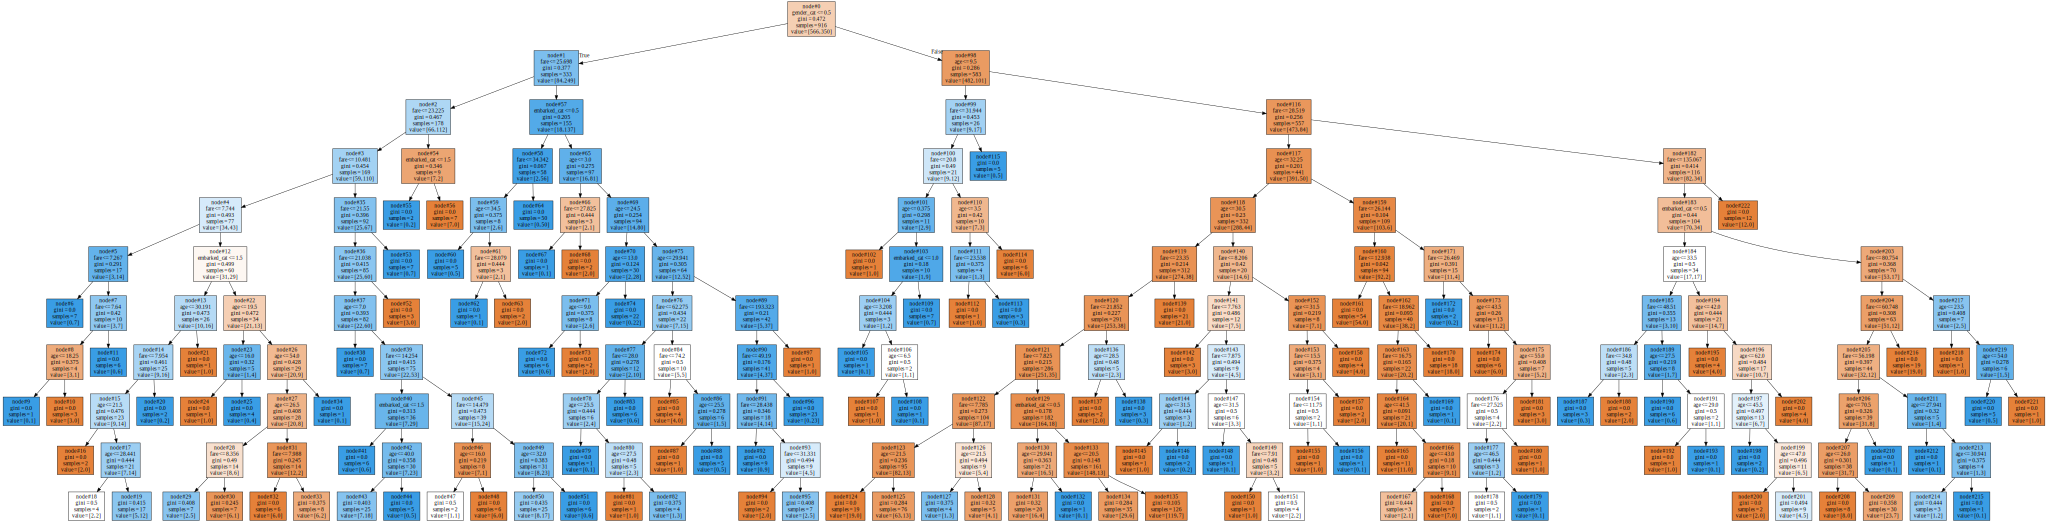

In [392]:
show_decision_tree_structure(dt_v4, feature_set_v3)

### Error analysis

In [395]:
validation["prediction"] = dt_v4.predict(validation[feature_set_v3])

In [401]:
validation.groupby(["survived", "prediction", "gender"]).size()

survived  prediction  gender
False     False       female     12
                      male      179
          True        female     31
                      male       21
True      False       female     10
                      male       45
          True        female     80
                      male       15
dtype: int64

### Hyperparameter tuning
Hyperparameters are those parameters we can set when we initialize a ML model. Their values can have a big impact 
into model performance.

How do we change them ? First we need to understand if our model is overfitting or underfitting and based on this information to change corresponding hyperparameters values.

Don’t exagerate and spend too much time to tune hyperparameters, especially in the first phase of the project. Would be recommended to spend that time for data understanding, feature engineering.

[DecisionTreeClassifier hyperparamenters](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

#### max_depth

In [410]:
max_depth_values = [1, 2, 3, 5, 10, 30, 60, 100]
train_accuracy = []
validation_accuracy = []
for depth in max_depth_values:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(train[feature_set_v3], train[target])
    train_accuracy.append(accuracy_score(train[target], dt.predict(train[feature_set_v3])))
    validation_accuracy.append(accuracy_score(validation[target], dt.predict(validation[feature_set_v3])))

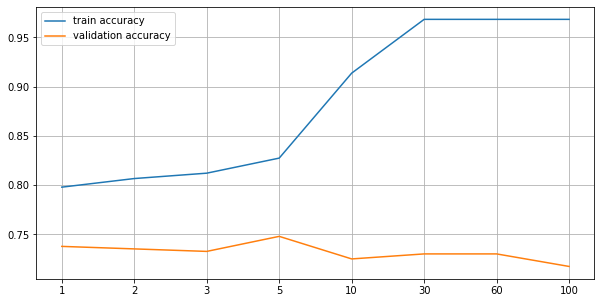

In [411]:
plt.figure(figsize=(10,5))
plt.xticks(range(0, len(max_depth_values)), max_depth_values)
plt.plot(train_accuracy, label="train accuracy")
plt.plot(validation_accuracy, label="validation accuracy")
plt.grid()
plt.legend()

#### min_samples_split
The minimum number of samples required to split an internal node

In [412]:
train_accuracy = []
validation_accuracy = []
min_samples_split_values = [2, 5, 10, 15, 20, 30, 40, 50, 70, 100]
for min_samples_split in min_samples_split_values:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(train[feature_set_v3], train[target])
    train_accuracy.append(accuracy_score(train[target], dt.predict(train[feature_set_v3])))
    validation_accuracy.append(accuracy_score(validation[target], dt.predict(validation[feature_set_v3])))

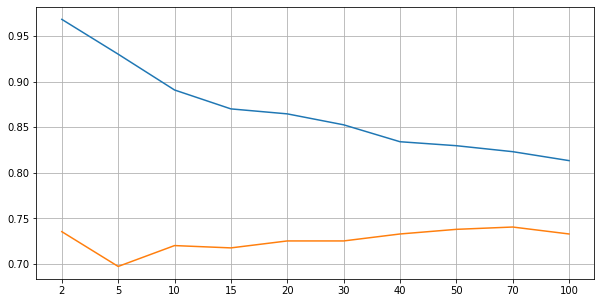

In [413]:
plt.figure(figsize=(10,5))
plt.xticks(range(0, len(min_samples_split_values)), min_samples_split_values)
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.grid()

#### min_samples_leaf
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. <br>

<b>write your own code </b>

#### Try multiple hyperparameters  
Trying multiple hyperparameter values in the same time can be done manually or [automatically](https://scikit-learn.org/stable/modules/grid_search.html).

In [414]:
hyperparameters_values = []
train_accuracy = []
validation_accuracy = []
max_depth_values = [1, 2, 3, 5, 10, 30, 60, 100]
min_samples_split_values = [2, 5, 10, 15, 20, 30, 40, 50]

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
        dt.fit(train[feature_set_v3], train[target])

        hyperparameters_values.append(f"{max_depth},{min_samples_split}")
        train_accuracy.append(accuracy_score(train[target], dt.predict(train[feature_set_v3])))
        validation_accuracy.append(accuracy_score(validation[target], dt.predict(validation[feature_set_v3])))
        

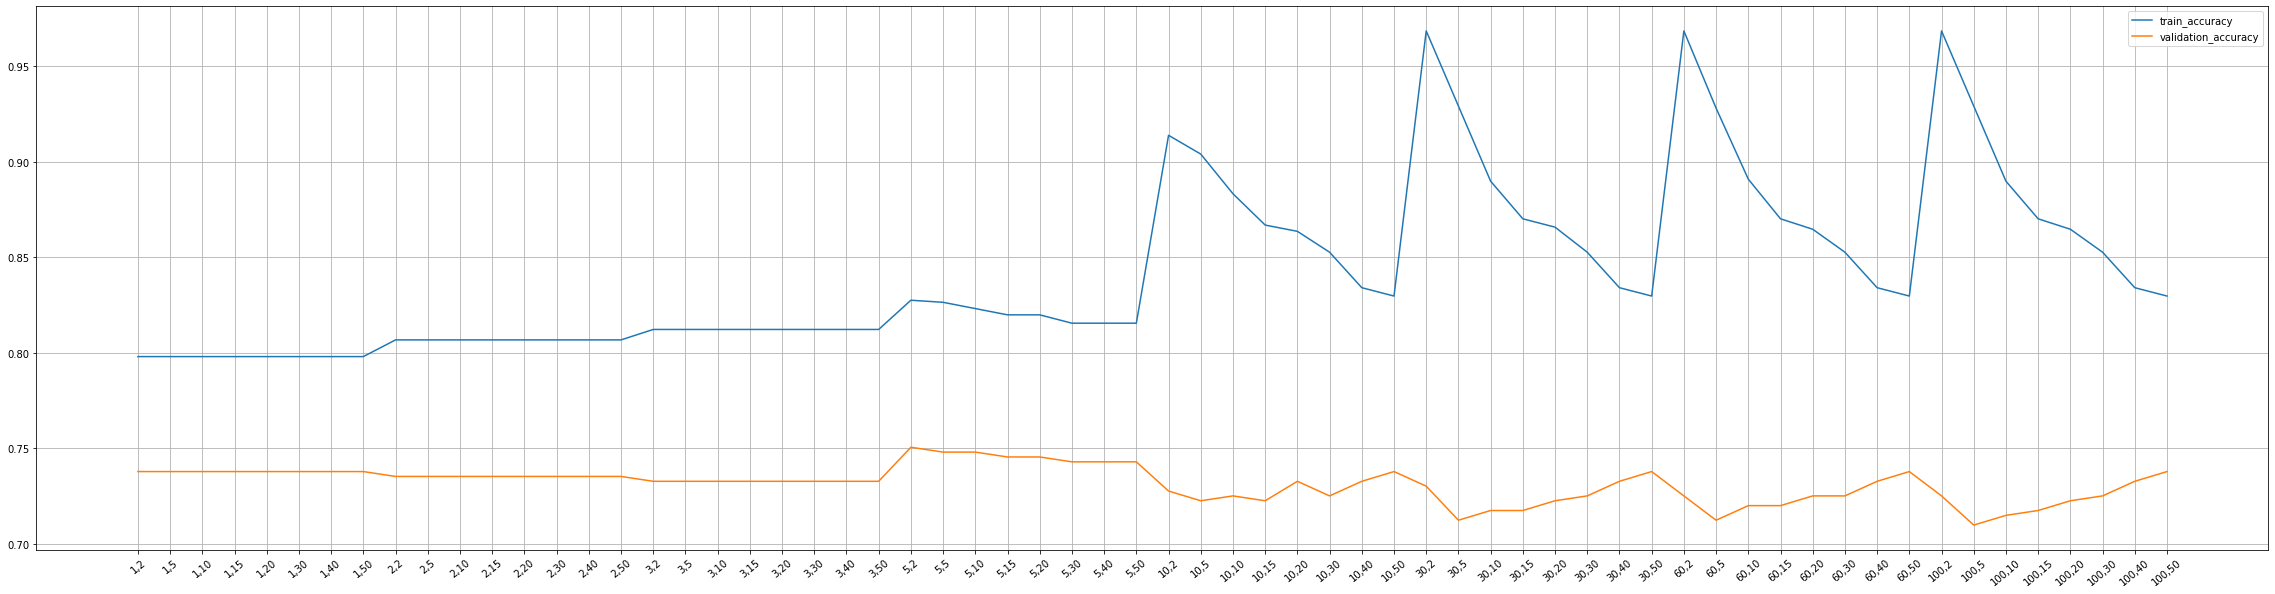

In [415]:
plt.figure(figsize=(40,10))
plt.xticks(range(0, len(hyperparameters_values)), hyperparameters_values, rotation='40')
plt.plot(train_accuracy, label="train_accuracy")
plt.plot(validation_accuracy, label="validation_accuracy")
plt.grid()
plt.legend()

### Other type of validation
Splitting our dataset in two parts is the common and easiest one, but not all the time the most effective, especially for small datasets. <br>
As you can observered, we made some hyperparameter changes. The main risk is that we could changed those hyperparameters until our model performs optimally only on the validation set and will not perform optimally/generalize in production environment.

To tackle this, we can apply another validation strategy, named k-fold. <br>
The dataset set is split into k smaller sets. The following procedure is followed for each of the k “folds”:
- a model is trained using k-1 of the folds as training data
- the resulting model is validated on the remaining part of  the data, 1 fold

![kfold](../resources/images/kfold.png)




In [440]:
dt_v5 = DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=random_state)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
cross_val_dt_stats = cross_validate(dt_v5, dataset[feature_set_v3], dataset[target], cv = kfold, scoring="accuracy", return_train_score=True )

In [441]:
cross_val_dt_stats

{'fit_time': array([0.00361705, 0.00428224, 0.00358486, 0.00364113, 0.00358915]),
 'score_time': array([0.0013907 , 0.00159883, 0.00141287, 0.00133371, 0.0019908 ]),
 'test_score': array([0.80534351, 0.80152672, 0.78625954, 0.75954198, 0.77394636]),
 'train_score': array([0.8061127 , 0.81852913, 0.80038204, 0.81279847, 0.8148855 ])}

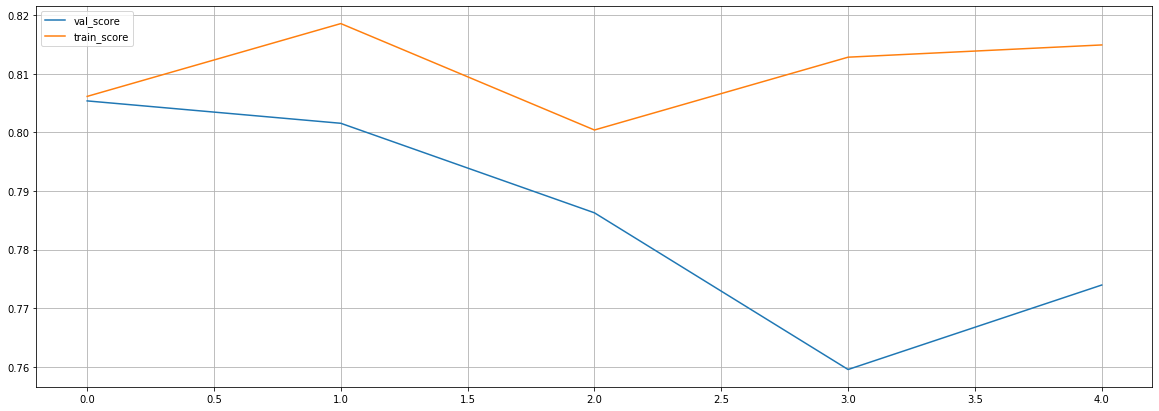

In [442]:
plt.figure(figsize=(20,7))
plt.plot(cross_val_dt_stats["test_score"], label="val_score")
plt.plot(cross_val_dt_stats["train_score"], label="train_score")
plt.legend()
plt.grid()

In [443]:
cross_val_dt_stats["test_score"].mean()

0.7853236231756895

### Final DecisionTree model

In [444]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=2)
dt.fit(dataset[feature_set_v3], dataset[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## RandomForestClassifier

A Random Forest is a ML model that trains a set of decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

![RandomForest](../resources/images/random_forest.png) <br>


Main characteristics :
- decision trees from RF are independent, so they can be trained in the same time, taking advantage of parallel computing
- each tree is trained with a slightly different input of data
- the average predictions is always better than a single model prediction. 

### Randomness from RandomForest 
Randomness in RF is given by :
- random input for each tree (hyperparameter bootstrap)
- random sample of features for each split node (hyperparameter max_features)


In [456]:
train_accuracy = []
validation_accuracy = []
for i in range(10):
    rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=None)
    rf.fit(train[feature_set_v3], train[target])
    
    train_accuracy.append(accuracy_score(train[target], rf.predict(train[feature_set_v3])))
    validation_accuracy.append(accuracy_score(validation[target], rf.predict(validation[feature_set_v3])))
    

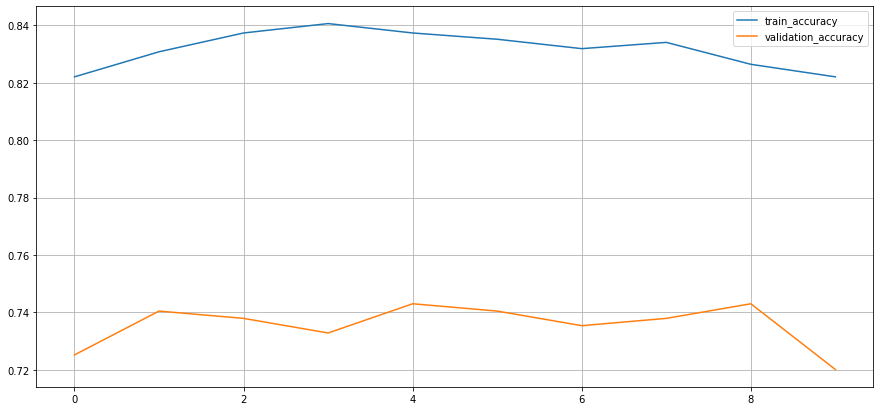

In [457]:
plt.figure(figsize=(15,7))
plt.plot(train_accuracy, label="train_accuracy")
plt.plot(validation_accuracy, label="validation_accuracy")
plt.grid()
plt.legend()

### Add new data
Training a model with relevant features will have the biggest impact for model performance. <br>
The ability to dig into the data and derive new features, insights is what makes a good ML engineer a great one.

In [458]:
feature_set_v3

['gender_cat', 'age', 'age_missing', 'fare', 'fare_missing', 'embarked_cat']

In [459]:
dataset.head(3)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,gender_cat,embarked_cat,age_missing,fare_missing
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,0,2,False,False
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1,2,False,False
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,2,False,False


In [460]:
feature_set_v4 = feature_set_v3 + ["pclass"]

In [117]:
train, validation = train_test_split(dataset, train_size=0.7, random_state=random_state, stratify = dataset.survived)

In [466]:
rf = RandomForestClassifier(n_estimators=30, max_depth=6, random_state=random_state)
rf.fit(train[feature_set_v4], train[target])

print(f"training accuracy {accuracy_score(train[target], rf.predict(train[feature_set_v4]))}")
print(f"validation accuracy {accuracy_score(validation[target], rf.predict(validation[feature_set_v4]))}")

training accuracy 0.87117903930131
validation accuracy 0.7735368956743003


#### Workshop work
try different hyperparameter values

In [494]:
rf = RandomForestClassifier(n_estimators=30, max_depth=6, random_state=random_state)
rf.fit(train[feature_set_v4], train[target])

print(f"training accuracy {accuracy_score(train[target], rf.predict(train[feature_set_v4]))}")
print(f"validation accuracy {accuracy_score(validation[target], rf.predict(validation[feature_set_v4]))}")

training accuracy 0.87117903930131
validation accuracy 0.7735368956743003


In [506]:
hyperparameters_values = []
train_accuracy = []
validation_accuracy = []
max_depth_values = [1, 2, 3, 5, 10, 30, 60, 100]
n_estimators_values = [2, 5, 10, 15, 20, 30, 40, 50, 70, 100]

best_validation_accuracy = 0
best_n_estimator = 0
best_max_depth = 0
for n_estimator in n_estimators_values:
    for max_depth in max_depth_values:
        rf = RandomForestClassifier(n_estimators=n_estimator, max_depth=max_depth, random_state=random_state)
        rf.fit(train[feature_set_v4], train[target])

        hyperparameters_values.append(f"{n_estimator},{max_depth}")
        train_accuracy.append(accuracy_score(train[target], rf.predict(train[feature_set_v4])))
        validation_accuracy.append(accuracy_score(validation[target], rf.predict(validation[feature_set_v4])))
        
        if accuracy_score(validation[target], rf.predict(validation[feature_set_v4])) > best_validation_accuracy :
            best_validation_accuracy = accuracy_score(validation[target], rf.predict(validation[feature_set_v4]))
            best_n_estimator = n_estimator
            best_max_depth = max_depth
        

In [507]:
print(f"Best values : {best_n_estimator} estimators, {best_max_depth} max_depth, {best_validation_accuracy} validation accuracy")

Best values : 15 estimators, 5 max_depth, 0.7913486005089059 validation accuracy


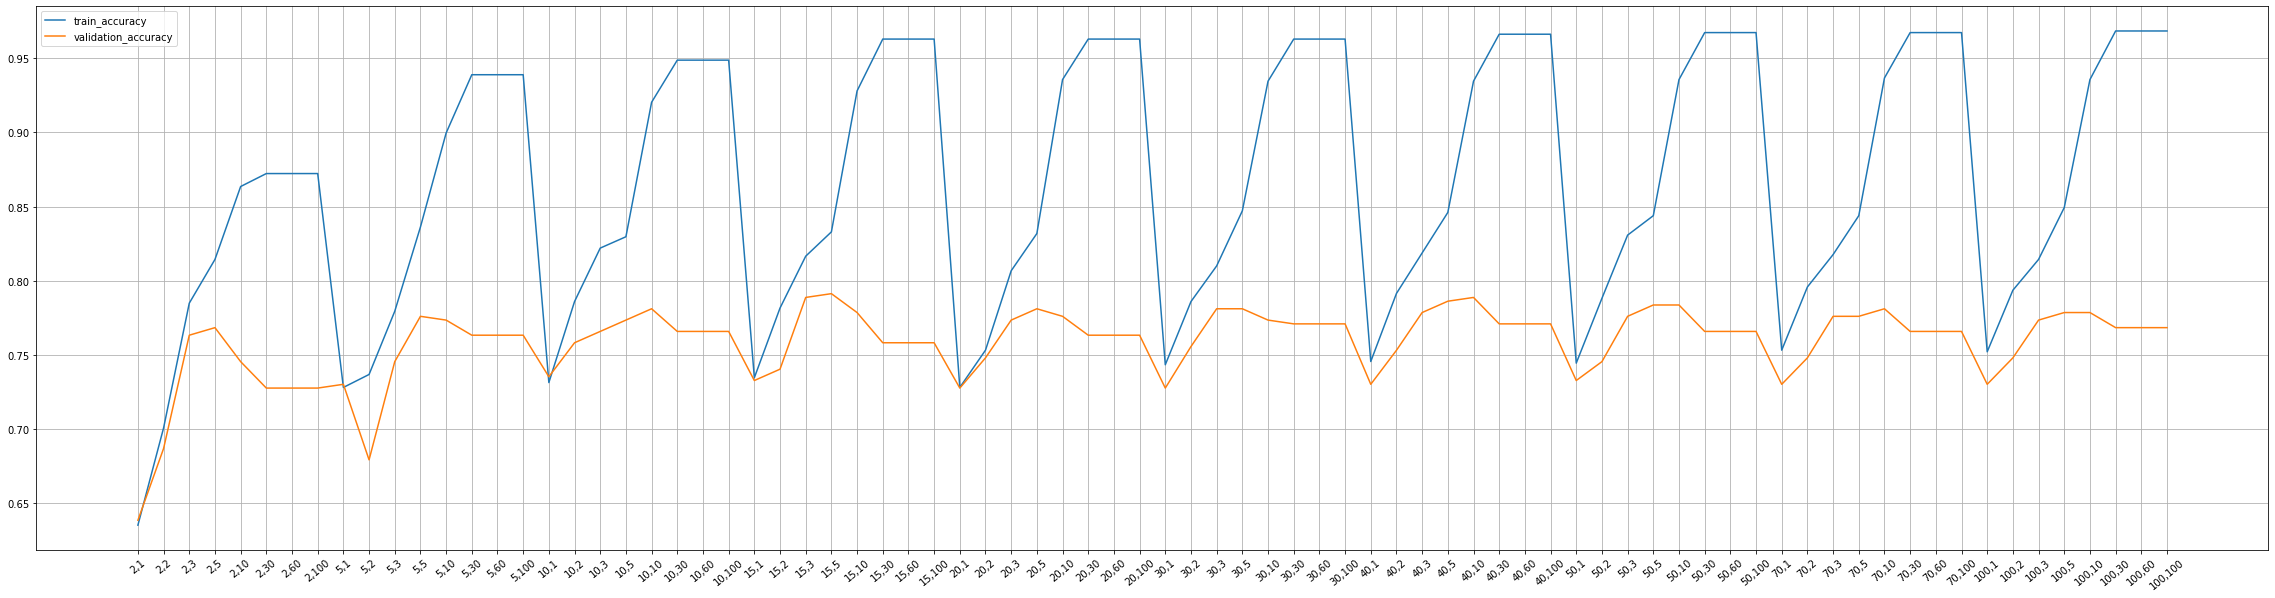

In [508]:
plt.figure(figsize=(40,10))
plt.xticks(range(0, len(hyperparameters_values)), hyperparameters_values, rotation='40')
plt.plot(train_accuracy, label="train_accuracy")
plt.plot(validation_accuracy, label="validation_accuracy")
plt.grid()
plt.legend()

### k-fold for RandomForestClassifier

In [509]:
rf = RandomForestClassifier(n_estimators=15, max_depth=5, random_state=random_state)

#### workshop work

In [510]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
cross_val_rf_stats = cross_validate(rf, dataset[feature_set_v4], dataset[target], cv=cv, scoring="accuracy", return_train_score=True)
cross_val_rf_stats

{'fit_time': array([0.01908016, 0.0183661 , 0.01901317, 0.01954889, 0.01780105]),
 'score_time': array([0.00309587, 0.00305295, 0.00311875, 0.00306511, 0.00274515]),
 'test_score': array([0.79770992, 0.80534351, 0.82824427, 0.7480916 , 0.7816092 ]),
 'train_score': array([0.83667622, 0.834766  , 0.82234957, 0.83667622, 0.84541985])}

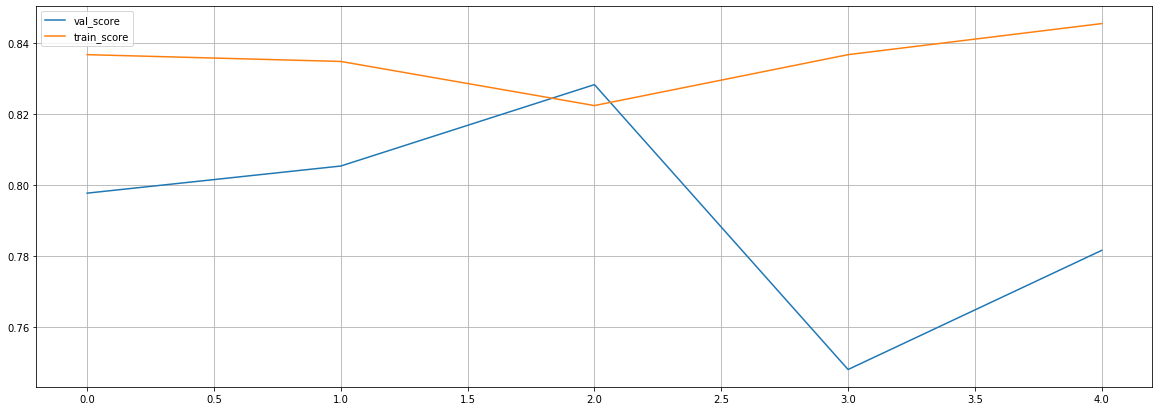

In [511]:
plt.figure(figsize=(20,7))
plt.plot(cross_val_rf_stats["test_score"], label="val_score")
plt.plot(cross_val_rf_stats["train_score"], label="train_score")
plt.legend()
plt.grid()

In [512]:
cross_val_rf_stats["test_score"].mean()

0.7921997016758796

# Regression algorithms - DecisionTree and RandomForest

Regression algorithms are used when we need to predict a continuous value ! <br>

We will use the same dataset, but now we will try to predict the age of the passanger.

### Imports

In [603]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold

In [518]:
#dataset.to_csv("../dataset/titanic/tmp/titanic_v4.csv", index=False)

### Read the data

In [731]:
dataset_reg = pd.read_csv("../dataset/titanic/tmp/titanic_v4.csv")

In [734]:
dataset_reg.head(5)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,gender_cat,embarked_cat,age_missing,fare_missing
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,0,2,False,False
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1,2,False,False
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,2,False,False
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,1,2,False,False
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0,2,False,False


## Decision Tree Regressor

For DecisionTreeClassifier we needed to find the best splits based on node impurities. Algorithm target is to create nodes with impurity as close as possible to 0. This will result in nodes containing samples almost from one single class.

DecisionTreeRegression needs to predict continuous values, so we will have an 'infinity' set of possible values. Because of this, we cannot rely on node impurity. <br>
Regression criteria used to find the best split is [MSE and MAE](https://scikit-learn.org/stable/modules/tree.html#regression-criteria). Both criterias measures how spread is the data into the node. Algorithm target is to create nodes with a spread as low as possible.




<img src="../resources/images/decision_tree_regressor_sample.png"/>

### Feature selection

In [735]:
dataset_reg.head(5)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,gender_cat,embarked_cat,age_missing,fare_missing
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,0,2,False,False
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1,2,False,False
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,2,False,False
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,1,2,False,False
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0,2,False,False


In [614]:
feature_set_reg_v1 = ["pclass", "survived", "gender_cat", "fare", "embarked_cat"]
target_reg = "age"

### Train/validation split

In [736]:
train_reg, validation_reg = train_test_split(dataset_reg, train_size=0.7, random_state=random_state)

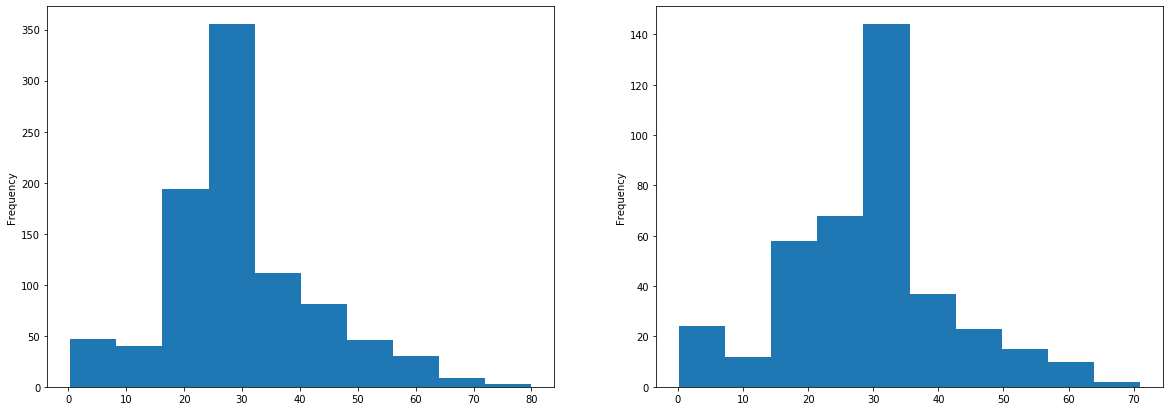

In [737]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
train_reg.age.plot.hist()
plt.subplot(1,2,2)
validation_reg.age.plot.hist()

### Initializing and training DecisionTreeRegression

In [738]:
dt_reg_v1 = DecisionTreeRegressor(max_depth=10)
dt_reg_v1.fit(train_reg[feature_set_reg_v1], train_reg[target_reg])

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [739]:
#save_decision_tree_structure(dt_reg_v1, "decision_tree_regressor_sample", feature_set_reg_v1)

### Prediction description

In [740]:
list(zip(dt_reg_v1.predict(validation_reg[feature_set_reg_v1][:10]), validation_reg[target_reg][:10]))

[(42.94056725621415, 37.0),
 (34.25, 48.0),
 (23.73926371665301, 0.1667),
 (19.0, 22.0),
 (39.0, 19.0),
 (28.597903834714252, 20.0),
 (46.666666666666664, 49.0),
 (14.34375, 5.0),
 (48.0, 21.0),
 (26.940567256214152, 19.0)]

### Model validation

In [741]:
print(f"training MAE : {mean_absolute_error(train_reg[target_reg], dt_reg_v1.predict(train_reg[feature_set_reg_v1]))}")
print(f"validation MAE : {mean_absolute_error(validation_reg[target_reg], dt_reg_v1.predict(validation_reg[feature_set_reg_v1]))}")

training MAE : 5.756834902343819
validation MAE : 10.222500166437323


Overfitting or underfitting ?

### Feature importance

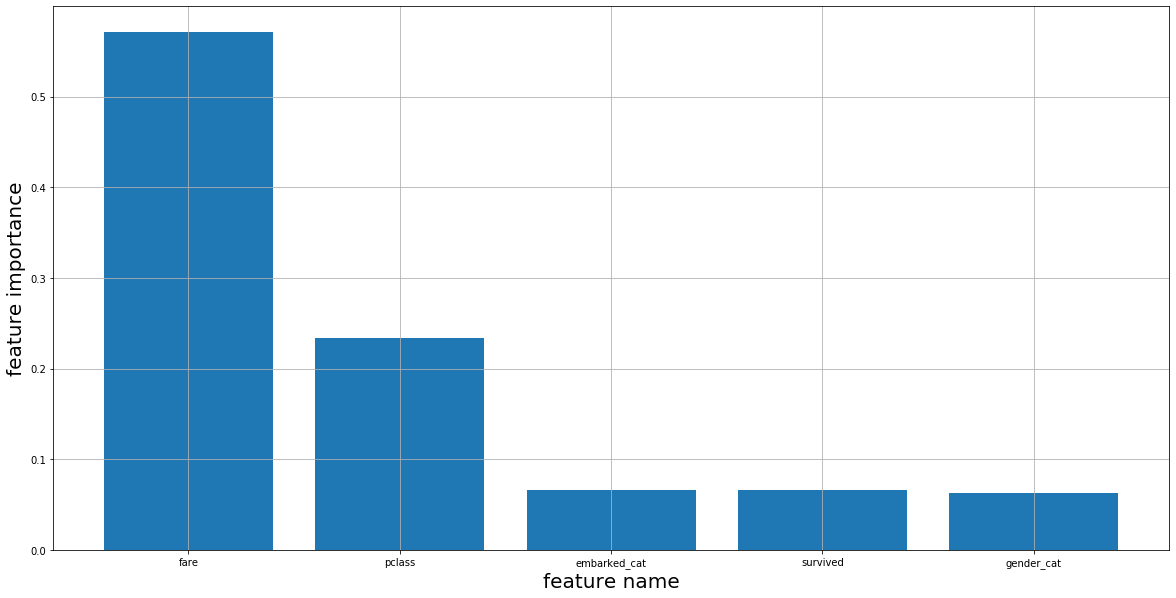

In [742]:
show_features_importance(dt_reg_v1, feature_set_reg_v1)

### Add new data

In [743]:
dataset.head(2)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,gender_cat,embarked_cat,age_missing,fare_missing
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,0,2,False,False
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1,2,False,False


In [744]:
feature_set_reg_v2 = ['pclass', 'survived', 'gender_cat', 'fare', 'embarked_cat', 'sibsp', 'parch']

In [745]:
train_reg, validation_reg = train_test_split(dataset_reg, train_size=0.7, random_state=random_state)

In [746]:
dt_reg_v2 = DecisionTreeRegressor(max_depth=10)
dt_reg_v2.fit(train_reg[feature_set_reg_v2], train_reg[target_reg])

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [747]:
print(f"training MAE : {mean_absolute_error(train_reg[target_reg], dt_reg_v2.predict(train_reg[feature_set_reg_v2]))}")
print(f"validation MAE : {mean_absolute_error(validation_reg[target_reg], dt_reg_v2.predict(validation_reg[feature_set_reg_v2]))}")

training MAE : 4.561571755333238
validation MAE : 8.771748916101568


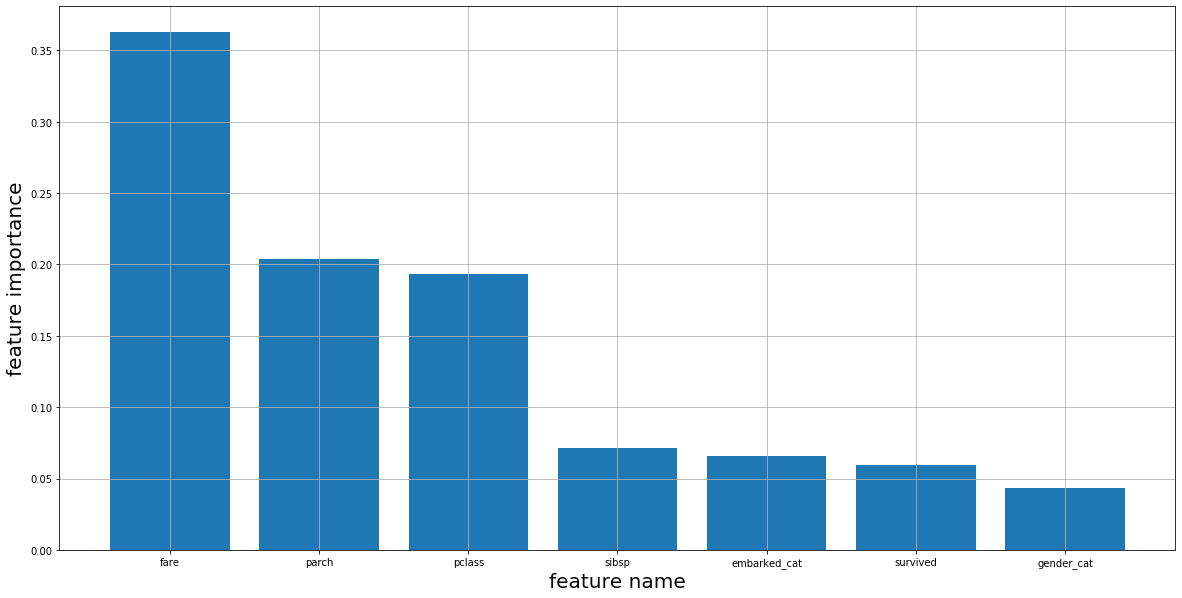

In [748]:
show_features_importance(dt_reg_v2, feature_set_reg_v2)

### Hyperparameter tuning

In [749]:
train_mae = []
validation_mae = []
max_depth_values = [1, 2, 3, 4, 5, 6, 10, 20, 40, 60, 90]

for max_depth in max_depth_values:
    dt_reg = DecisionTreeRegressor(max_depth=max_depth)
    dt_reg.fit(train_reg[feature_set_reg_v2], train_reg[target_reg])
    
    train_mae.append(mean_absolute_error(train_reg[target_reg], dt_reg.predict(train_reg[feature_set_reg_v2])))
    validation_mae.append(mean_absolute_error(validation_reg[target_reg], dt_reg.predict(validation_reg[feature_set_reg_v2])))

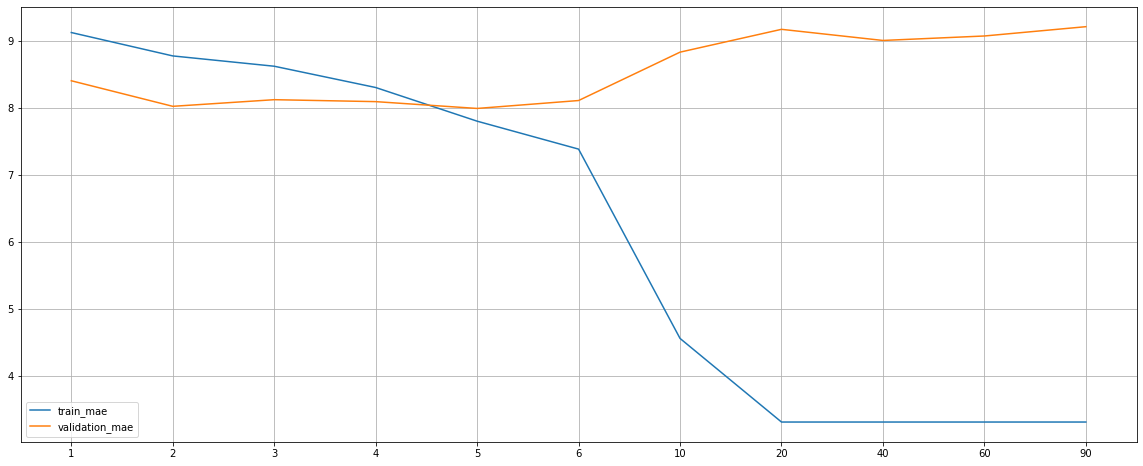

In [694]:
plt.figure(figsize=(20,8))
plt.xticks(range(0, len(max_depth_values)), max_depth_values)
plt.plot(train_mae, label="train_mae")
plt.plot(validation_mae, label="validation_mae")
plt.legend()
plt.grid()

### Error analysis

In [750]:
validation_reg["prediction"] = dt_reg_v2.predict(validation_reg[feature_set_reg_v2])
validation_reg["prediction_error"] = abs(validation_reg[target_reg] - validation_reg["prediction"])

#### Best predictions

In [945]:
validation_reg.sort_values(by="prediction_error")[:10]

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,gender_cat,embarked_cat,age_missing,fare_missing,prediction,prediction_error
962,3,False,"Lennon, Mr. Denis",male,29.881135,1,0,370371,15.5000,NaN,Q,1,1,False,False,29.881135,0.0
1185,3,False,"Samaan, Mr. Hanna",male,29.881135,2,0,2662,21.6792,NaN,C,1,0,False,False,29.881135,0.0
902,3,False,"Johnston, Mr. Andrew G",male,29.881135,1,2,W./C. 6607,23.4500,NaN,S,1,2,False,False,29.881135,0.0
1174,3,False,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.881135,8,2,CA. 2343,69.5500,NaN,S,0,2,False,False,29.881135,0.0
908,3,False,"Jussila, Miss. Mari Aina",female,21.000000,1,0,4137,9.8250,NaN,S,0,2,False,False,21.000000,0.0
1069,3,False,"O'Brien, Mr. Thomas",male,29.881135,1,0,370365,15.5000,NaN,Q,1,1,False,False,29.881135,0.0
473,2,False,"Knight, Mr. Robert J",male,29.881135,0,0,239855,0.0000,NaN,S,1,2,False,False,29.881135,0.0
657,3,True,"Baclini, Miss. Eugenie",female,0.750000,2,1,2666,19.2583,NaN,C,0,0,False,False,0.750000,0.0
420,2,False,"Giles, Mr. Frederick Edward",male,21.000000,1,0,28134,11.5000,NaN,S,1,2,False,False,21.000000,0.0
1172,3,False,"Sage, Miss. Ada",female,29.881135,8,2,CA. 2343,69.5500,NaN,S,0,2,False,False,29.881135,0.0


#### Worst predictions

In [944]:
validation_reg.sort_values(by="prediction_error", ascending=False)[:10]

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,gender_cat,embarked_cat,age_missing,fare_missing,prediction,prediction_error
122,1,True,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,13568,49.5000,B39,C,0,0,False,False,64.0000,42.0000
430,2,True,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,0,2,False,False,46.5000,40.5000
60,1,False,"Cavendish, Mr. Tyrell William",male,36.0,1,0,19877,78.8500,C46,S,1,2,False,False,76.0000,40.0000
137,1,True,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,2,False,False,58.0000,39.0000
917,3,True,"Karun, Mr. Franz",male,39.0,0,1,349256,13.4167,NaN,C,1,0,False,False,0.4167,38.5833
315,1,True,"Willard, Miss. Constance",female,21.0,0,0,113795,26.5500,NaN,S,0,2,False,False,58.0000,37.0000
188,1,True,"Lines, Mrs. Ernest H (Elizabeth Lindsey James)",female,51.0,0,1,PC 17592,39.4000,D28,S,0,2,False,False,16.0000,35.0000
502,2,True,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S,0,2,False,False,6.0000,35.0000
350,2,True,"Brown, Miss. Edith Eileen",female,15.0,0,2,29750,39.0000,NaN,S,0,2,False,False,46.5000,31.5000
535,2,False,"Phillips, Mr. Escott Robert",male,43.0,0,1,S.O./P.P. 2,21.0000,NaN,S,1,2,False,False,13.0000,30.0000


### kfold validation

In [756]:
dt_reg = DecisionTreeRegressor(max_depth=5)
kfold_reg = KFold(n_splits=5, shuffle=True, random_state=random_state)

In [757]:
cross_val_rf_reg_stats = cross_validate(dt_reg, dataset_reg[feature_set_reg_v2], dataset_reg[target_reg], cv = kfold_reg, scoring="neg_mean_absolute_error", return_train_score=True)


In [758]:
cross_val_rf_reg_stats

{'fit_time': array([0.00364399, 0.00451589, 0.00325918, 0.00355983, 0.00326514]),
 'score_time': array([0.00129294, 0.00127292, 0.00125599, 0.00136089, 0.00126004]),
 'test_score': array([-7.80149393, -8.61351702, -8.28934864, -8.45474634, -8.6993683 ]),
 'train_score': array([-7.98357718, -7.57581994, -7.83345174, -7.7269565 , -7.56501986])}

In [759]:
print(f"training MAE {abs(cross_val_rf_reg_stats['train_score'].mean())}")
print(f"validation MAE {abs(cross_val_rf_reg_stats['test_score'].mean())}")

training MAE 7.73696504467907
validation MAE 8.371694846195098


## Random Forest Regressor

In [760]:
from sklearn.ensemble import RandomForestRegressor

In [771]:
rf_reg = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=random_state)
kfold_rf_reg = KFold(n_splits=5, shuffle=True, random_state=random_state)
cv_rf_stats = cross_validate(rf_reg, dataset_reg[feature_set_reg_v2], dataset_reg[target_reg], scoring="neg_mean_absolute_error", cv=kfold_rf_reg, return_train_score=True  )


In [777]:
print(f"training MAE {abs(cv_rf_stats['train_score'].mean())}")
print(f"validation MAE {abs(cv_rf_stats['test_score'].mean())}")



training MAE 7.600333563180671
validation MAE 8.246865077887353
